## Example 2 - Running a Sweep and Checking for Convergence.

For this example, we want to run MPT-Calculator over the frequency range $10^3$ rad/s to $10^6$ rad/s in 20 logarithmically spaced steps. We will consider a homogeneous wrench object, defined in [Wrench.geo](./GeoFiles/Wrench.geo). The object has conductivity $\sigma_* = 3.5 \times 10^7$ S/m, relative permeability $\mu_r = 1$, and object size $\alpha = 1\times 10^{-3}$.

We need to run the simulation with these settings, and check that the solution we obtain is converged for the entire frequency range of interest. To do this, we will iterate MPT-Calculator for increasing orders $𝑝=2,3,4$.

## Defining object size and frequency sweep
Here, we specify that we want to consider an object with $\alpha=0.001$ m and the frequency range $10^3 \ge \omega \ge 10^6$. In this example, we wish to consider 20 logarithmically spaced frequencies.

## $p$ Refinement and plotting the result
We now wish to iterate through different orders and plot the output eigenvalues to check for agreement. As with other examples, we set the root directory and import the main function. In this case, we also need to import matplotlib.

In [1]:
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path= r'C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator'
os.chdir(Your_Path)
os.getcwd()

from main import main
from matplotlib import pyplot as plt

We next set the frequency sweep, geometry, and discretisation.

In [2]:
geometry = 'Wrench.geo'
start = 3
stop = 6
points = 20
alpha = 1e-3
mesh_coarseness = 'coarse'

start_stop = (start, stop, points)

and run $\texttt{main}$ for the different orders and superimpose the eigenvalues. Here, we just show an example for the first eigenvalue.

Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  21946 elements


Solving Theta0: 100%|█████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 199.35it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|████████████████████████████████████████████████████████| 20/20 [04:17<00:00, 12.86s/it]


Frequency Sweep complete
Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  21946 elements


Solving Theta0: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|████████████████████████████████████████████████████████| 20/20 [21:44<00:00, 65.23s/it]


Frequency Sweep complete
Wrench.geo
generating mesh
Mesh Contains Prisms? False
N Prisms: 0, N Tets: 21946


C:\Users\James\Desktop\Release_Ready_MPT_Calculator\Restructured_MPT_Calculator\main.py:257: UserWarning: It looks like the main function was invoked from a jupyter notebook. 
Currently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. 
Unless you saved the file before running the code, this may not be the correct file.
  warn('It looks like the main function was invoked from a jupyter notebook. \nCurrently saving a .ipynb file is done by copying the most recent file in the .ipynb_checkpoints folder. \nUnless you saved the file before running the code, this may not be the correct file.', stacklevel=1)


 mesh contains  21946 elements


Solving Theta0: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


 solved theta0 problems    
 solving theta1


Solving Theta1: 100%|████████████████████████████████████████████████████████| 20/20 [31:16<00:00, 93.81s/it]


Frequency Sweep complete


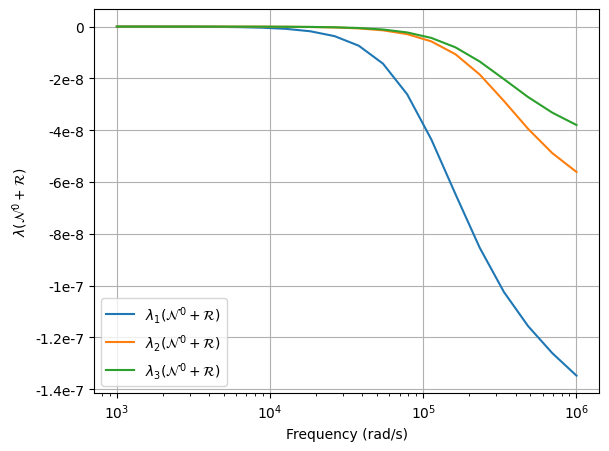

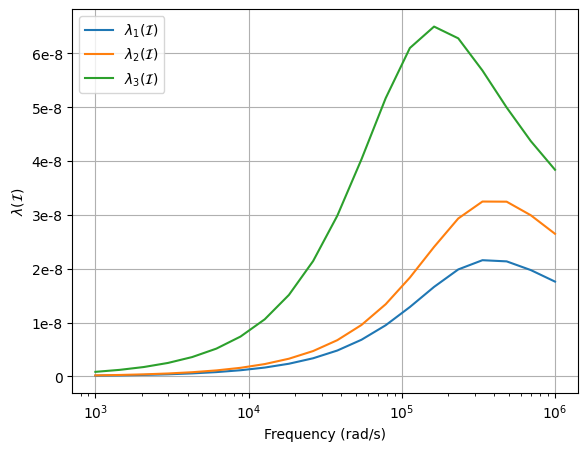

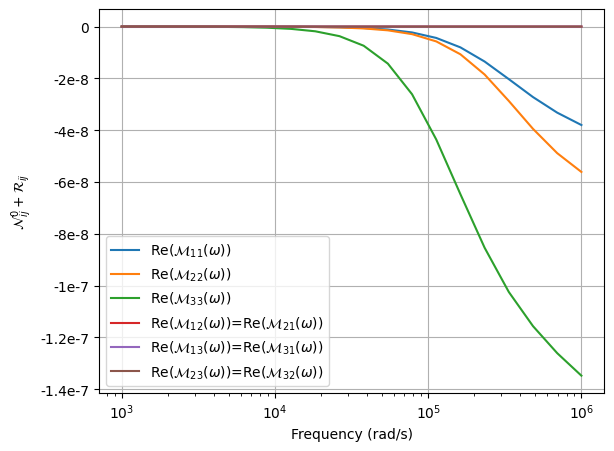

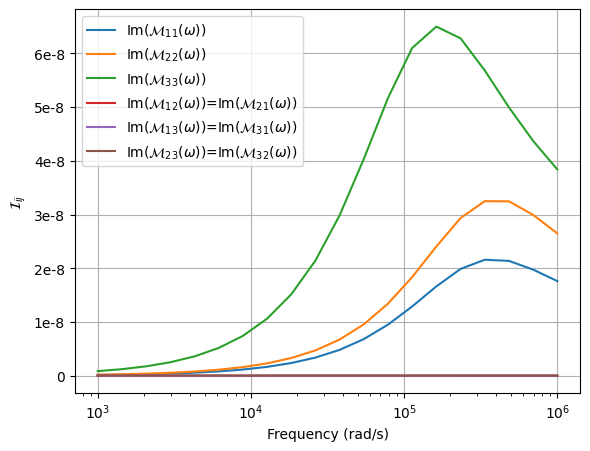

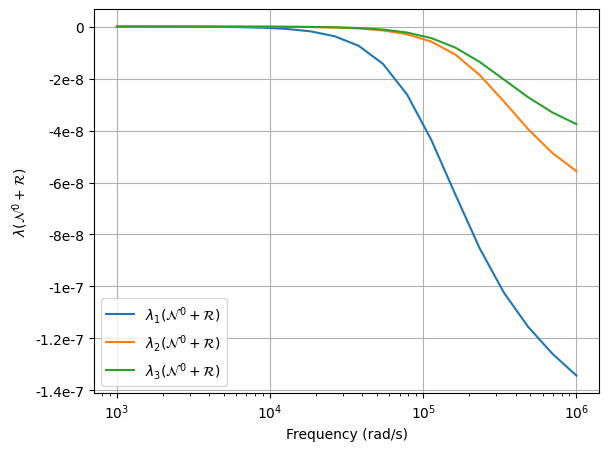

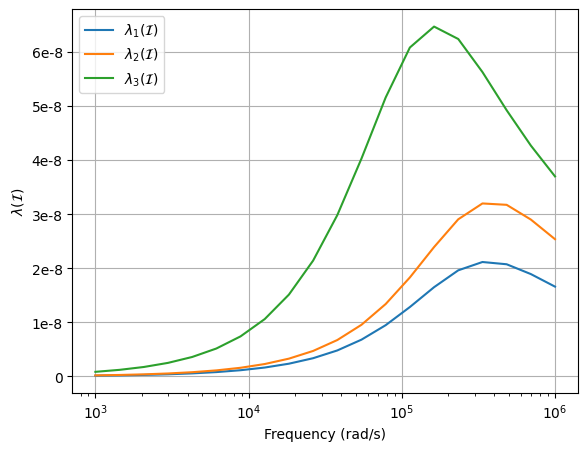

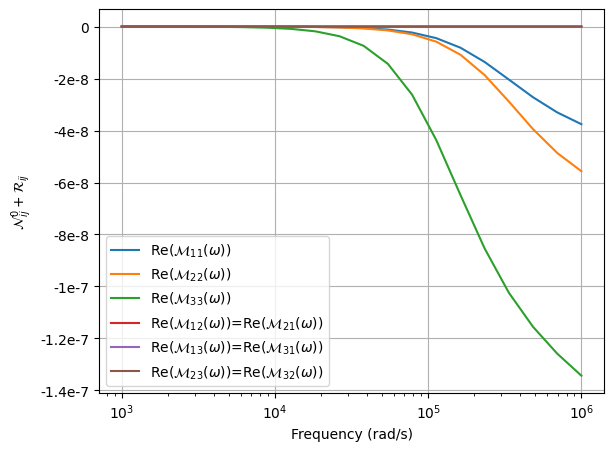

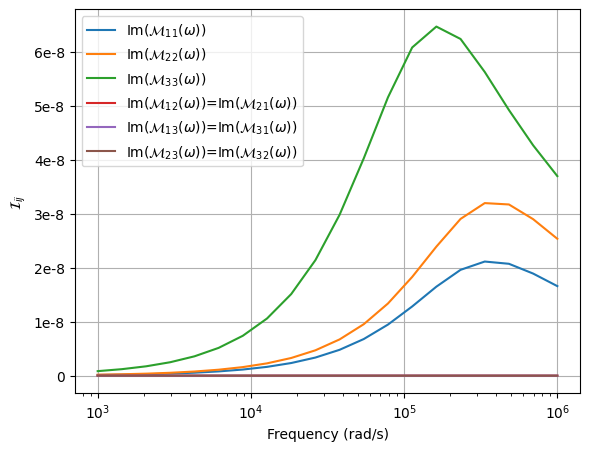

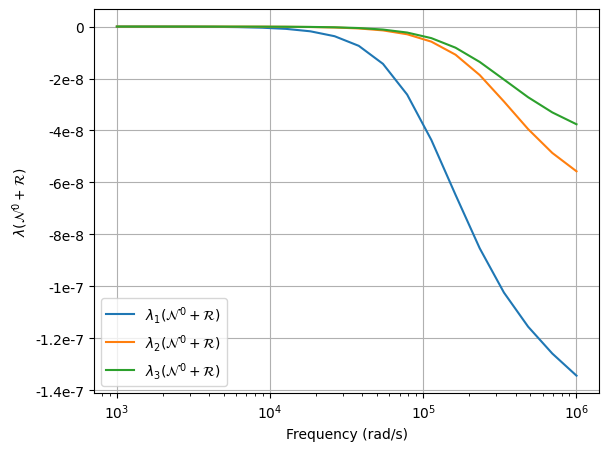

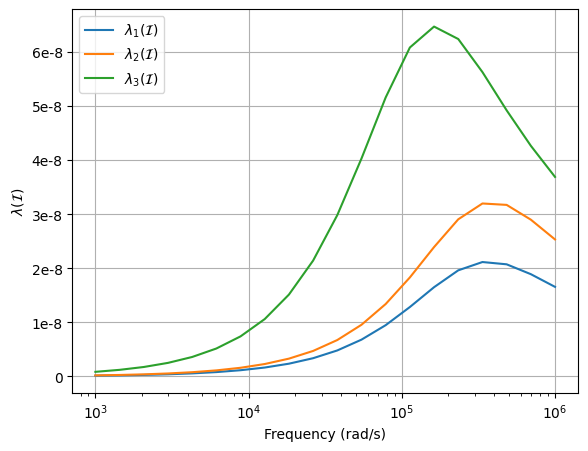

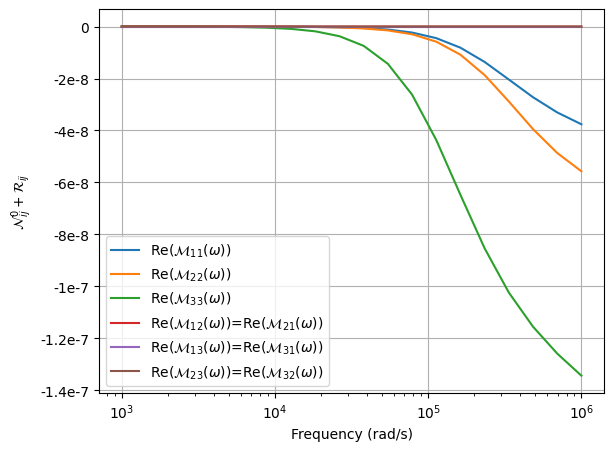

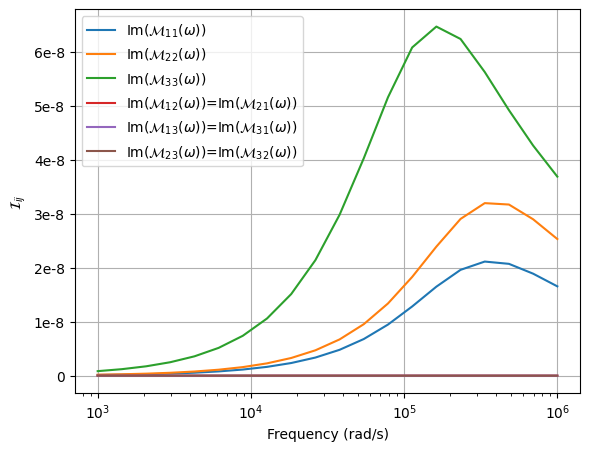

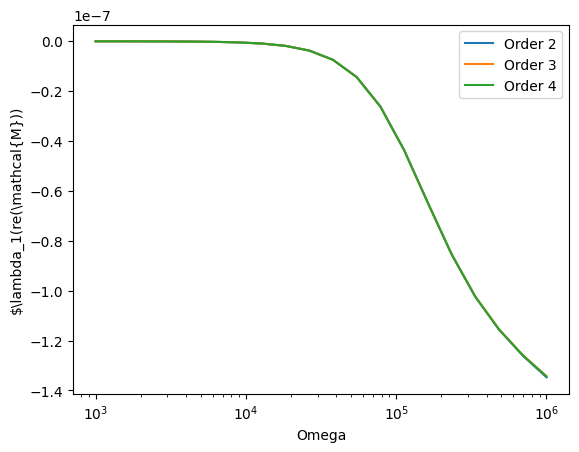

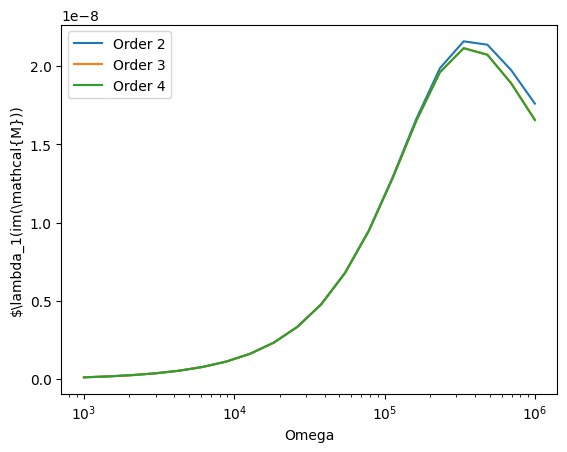

In [3]:
plt.figure(1)
plt.figure(2)

for p in [2,3,4]:
    result = main(geometry=geometry, alpha=alpha, h=mesh_coarseness, start_stop=start_stop, order=p)
    plt.figure(1)
    plt.semilogx(result['FrequencyArray'], result['EigenValues'][:,0].real, label=f'Order {p}')
    plt.figure(2)
    plt.semilogx(result['FrequencyArray'], result['EigenValues'][:,0].imag, label=f'Order {p}')

plt.figure(1)
plt.xlabel('Omega')
plt.ylabel('$\lambda_1(re(\mathcal{M}))')
plt.legend()

plt.figure(2)
plt.xlabel('Omega')
plt.ylabel('$\lambda_1(im(\mathcal{M}))')
plt.legend()